In [83]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
α=0.5
β=0.3
N0=1000000
S0=990000
I0=7000
R0=3000
t0, tf = 0, 25


In [19]:
def dsdt(t, s):
    return -α*s

In [60]:
susceptible = integrate.solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)


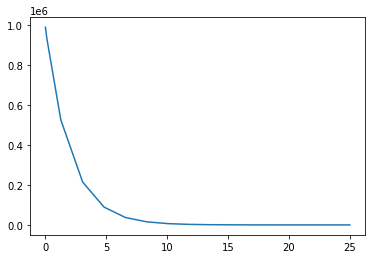

In [64]:
time = np.linspace(t0, tf, tf)
t, s = susceptible.t, susceptible.y[0]
plt.plot(t, s)
plt.show()

In [79]:
def dsdi(t, i):
    y = α*susceptible.sol(t) - β*i
    return y
infected = integrate.solve_ivp(dsdi, (t0, tf), [I0], dense_output=True)

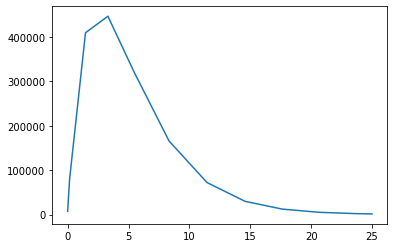

In [80]:
time = np.linspace(t0, tf, tf)
t, s = infected.t, infected.y[0]
plt.plot(t, s)
plt.show()

In [81]:
def didt(t, i):
    y = β*i
    return y
convalescent = integrate.solve_ivp(didt, (t0, tf), [I0], dense_output=True)

3000.0


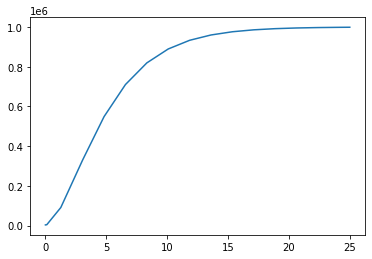

In [84]:
t = list(susceptible.t)
y = []

for num in range(len(t)):
    y.append(N0 - susceptible.sol(t[num])[0] - infected.sol(t[num])[0])

convalescent = interp1d(t, y, kind='cubic')
print(convalescent(0))
plt.plot(t, convalescent(t));

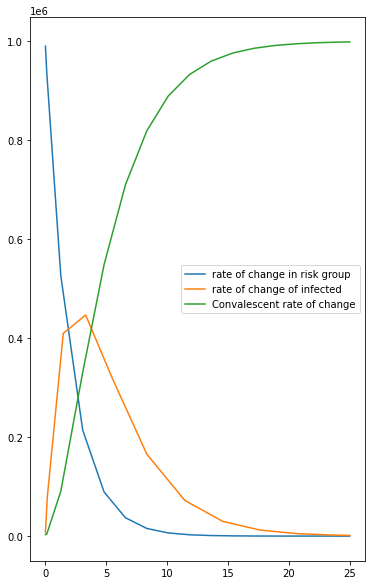

In [96]:
plt.plot(susceptible.t, susceptible.y[0], label="rate of change in risk group")
plt.plot(infected.t, infected.y[0], label="rate of change of infected")
plt.plot(t, convalescent(t), label="Convalescent rate of change")
plt.rcParams["figure.figsize"] = [6, 10]
plt.legend()